## Data Review / Analytic

Review data used for the ai model to build for the support app

#### Data Import

Importing the csv data into a dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/twcs.csv")

#### Basic Information

Review basic information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [4]:
df.head(20)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [5]:
df.isnull().sum()

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

#### Data Distribution 

Review basic data distrubution from the given dataset

##### Authors

Review the top authors id from the dataset

In [6]:
author_id_count = df['author_id'].value_counts()

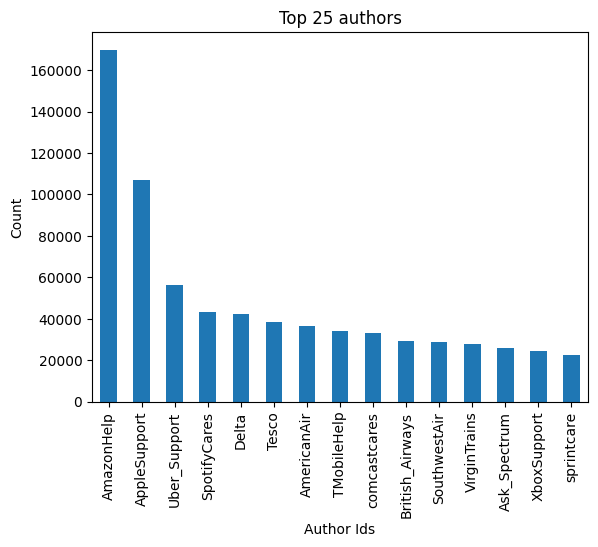

In [7]:
author_id_count[:15].plot(kind='bar')
plt.xlabel("Author Ids")
plt.ylabel("Count")
plt.title("Top 25 authors")
plt.show()

Review 5 samples from the a few of the authors

In [8]:
df[df['author_id'] == 'AmazonHelp'].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
181,269,AmazonHelp,False,Wed Nov 22 09:23:01 +0000 2017,@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないというのは...,"270,271",272.0
184,273,AmazonHelp,False,Wed Nov 22 09:40:27 +0000 2017,@115770 カスタマーサービスにてお問い合わせ済みとのことで、お手数をおかけいたしました...,274,271.0
186,275,AmazonHelp,False,Wed Nov 22 10:06:26 +0000 2017,@115770 恐れ入ります。至らない点も多々あるかとは存じますが、今後ともどうぞよろしくお...,NaN,274.0
234,324,AmazonHelp,False,Wed Nov 22 09:06:00 +0000 2017,@115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端末の...,NaN,325.0
321,615,AmazonHelp,False,Tue Oct 31 22:29:00 +0000 2017,@115820 I'm sorry we've let you down! Without ...,616,617.0


In [9]:
df[df['author_id'] == 'AppleSupport'].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
396,696,AppleSupport,False,Tue Oct 31 22:27:49 +0000 2017,@115854 We're here for you. Which version of t...,697,698.0
398,699,AppleSupport,False,Tue Oct 31 22:36:27 +0000 2017,@115854 Lets take a closer look into this issu...,NaN,697.0
401,701,AppleSupport,False,Tue Oct 31 22:26:49 +0000 2017,@115855 Let's go to DM for the next steps. DM ...,NaN,702.0
403,703,AppleSupport,False,Tue Oct 31 22:09:52 +0000 2017,@115855 Any steps tried since it started last ...,702,704.0
405,705,AppleSupport,False,Tue Oct 31 21:57:00 +0000 2017,@115855 That's great it has iOS 11.1 as we can...,"706,704",707.0


##### Inbound 

Review the inbound 

In [10]:
df[df['inbound'] == True].iloc[0]

tweet_id                                                               2
author_id                                                         115712
inbound                                                             True
created_at                                Tue Oct 31 22:11:45 +0000 2017
text                       @sprintcare and how do you propose we do that
response_tweet_id                                                    NaN
in_response_to_tweet_id                                              1.0
Name: 1, dtype: object

In [11]:
df[df['inbound'] == False].iloc[0]

tweet_id                                                                   1
author_id                                                         sprintcare
inbound                                                                False
created_at                                    Tue Oct 31 22:10:47 +0000 2017
text                       @115712 I understand. I would like to assist y...
response_tweet_id                                                          2
in_response_to_tweet_id                                                  3.0
Name: 0, dtype: object

Compare a much large set of the inbound 

In [12]:
df[df['inbound'] == True].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
8,12,115713,True,Tue Oct 31 22:04:47 +0000 2017,@sprintcare You gonna magically change your co...,"11,13,14",15.0


In [13]:
df[df['inbound'] == False].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0


In [14]:
inbound_count = df["inbound"].value_counts()

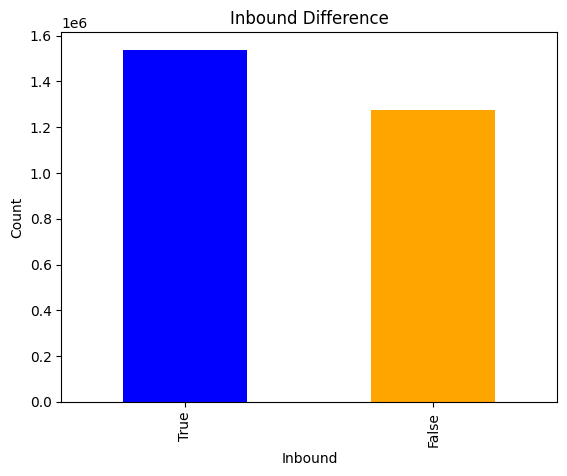

In [15]:
inbound_count.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Inbound")
plt.ylabel("Count")
plt.title("Inbound Difference")
plt.show()

Interesting to see the inbound are pretty similar 

Next we need to check the if the inbound is consistent with the author

In [16]:
inbound_count_true = df[df['inbound'] == True]
inbound_count_true = inbound_count_true["author_id"].value_counts()

In [17]:
inbound_count_false = df[df["inbound"] == False]
inbound_count_false = inbound_count_false["author_id"].value_counts()

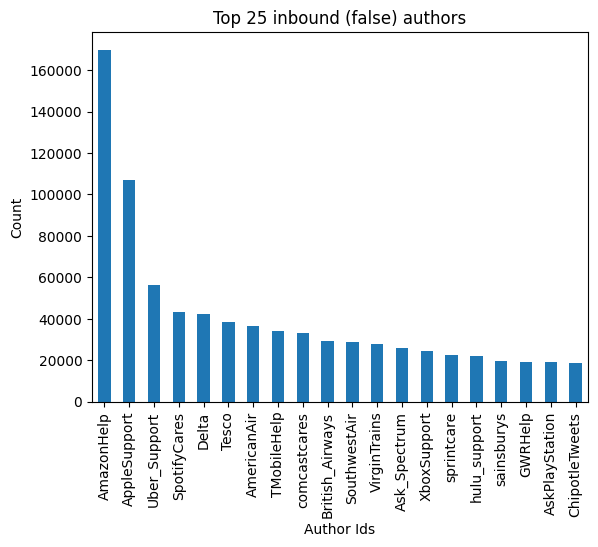

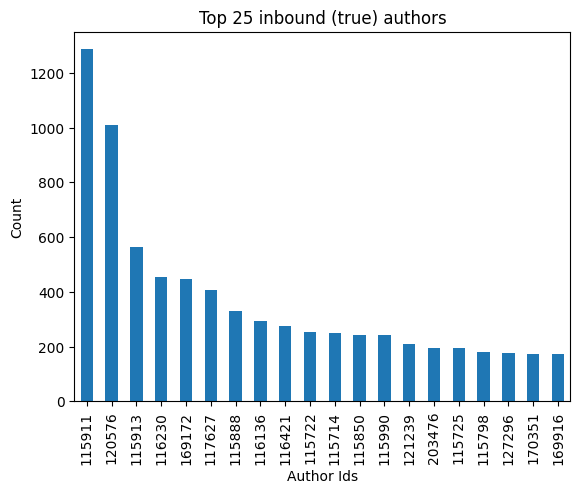

In [18]:
inbound_count_false[:20].plot(kind='bar')
plt.xlabel("Author Ids")
plt.ylabel("Count")
plt.title("Top 25 inbound (false) authors")
plt.show()

inbound_count_true[:20].plot(kind='bar')
plt.xlabel("Author Ids")
plt.ylabel("Count")
plt.title("Top 25 inbound (true) authors")
plt.show()

With the higher number of messages. These are probably not support request by a single person. 

Lets review one of the author id to confirm this guess.

In [19]:
df[df['author_id'] == '115911']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
622,1068,115911,True,Tue Oct 31 22:19:12 +0000 2017,@115910 No sir! You can still preorder at http...,1067,1069.0
624,1070,115911,True,Tue Oct 31 22:16:12 +0000 2017,@115910 Go for it Trevor *ErikS,1069,1071.0
626,1072,115911,True,Thu Oct 26 21:13:40 +0000 2017,Be ready for your next iPhone. Join our iPhone...,"1071,1073,1074,1075,1076,1077,1078,1079,1080,1...",NaN
1346,1950,115911,True,Tue Oct 31 22:27:18 +0000 2017,"@116149 I mean...it does say to ""submit your c...",1949,1951.0
1348,1952,115911,True,Tue Oct 31 13:00:17 +0000 2017,Happy Halloween! Submit your costume pics with...,"1953,1954,1955,1956,1957,1958,1959,1960,1961,1...",NaN
...,...,...,...,...,...,...,...
2797680,2974233,115911,True,Thu Nov 30 02:24:15 +0000 2017,@820276 Come back to your #MagentaFam! 🙌👍😊 *JPL,2974232,2974234.0
2802786,2979188,115911,True,Tue Oct 31 20:26:47 +0000 2017,@576616 You can block known scam numbers by di...,2979187,2979189.0
2802788,2979190,115911,True,Tue Oct 31 20:20:33 +0000 2017,@576616 We're working to cut down on scam call...,2979189,2979191.0
2811004,2987195,115911,True,Tue Nov 21 21:31:55 +0000 2017,"@823653 Of course, Shawn! Where are you going ...",2987194,2987196.0


These appear to be support messages. To validate this, lets looked at a few of the handles being mentioned.

In [20]:
df[df['author_id'] == '115910']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
621,1067,115910,True,Tue Oct 31 22:21:24 +0000 2017,@115911 Sweet! I’m still paying on my 7plus bu...,1066,1068.0
623,1069,115910,True,Tue Oct 31 22:17:06 +0000 2017,@115911 Are pre orders done for the X?,1068,1070.0
625,1071,115910,True,Tue Oct 31 22:15:20 +0000 2017,@115911 I have a question.,1070,1072.0
2630246,2802658,115910,True,Wed Nov 22 01:27:33 +0000 2017,@TMobileHelp https://t.co/gNDsv8I4ME,2802659,2802657.0
2630248,611689,115910,True,Wed Nov 22 01:08:46 +0000 2017,"@115911 @144529 After redeeming, how long do w...",2802657,611684.0


Not sure if this can be completely cleared as trying to noticed the difference between a true cusotmer vs support agent might be challenging

##### Response Tweet Id

Lets look into the nan values the for the response tweet id. These might be customer support messages the support agent never responded back.

In [21]:
response_tweet_id_nan = df[df['response_tweet_id'].isna()]

In [22]:
response_tweet_id_nan.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
13,19,sprintcare,False,Tue Oct 31 22:10:10 +0000 2017,@115715 Please send me a private message so th...,NaN,20.0
19,27,Ask_Spectrum,False,Tue Oct 31 22:21:26 +0000 2017,@115716 No thank you. ^JK,NaN,26.0
20,23,115716,True,Tue Oct 31 22:16:05 +0000 2017,@Ask_Spectrum The correct way to do it is via ...,NaN,21.0


In [23]:
response_tweet_id_nan.iloc[0]

tweet_id                                                               2
author_id                                                         115712
inbound                                                             True
created_at                                Tue Oct 31 22:11:45 +0000 2017
text                       @sprintcare and how do you propose we do that
response_tweet_id                                                    NaN
in_response_to_tweet_id                                              1.0
Name: 1, dtype: object

In [24]:
df[df['tweet_id'] == 1]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0


In [25]:
df[df['tweet_id'] == 3]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0


Looks like the converstation has ended from the nan values found. However looks like the time is decreasing as each tweet is tracked.

We will want to find the first initial support requeset. 

##### In response to tweet

Looks like the "in response to tweet id" is related the ongoing conversation of the customer support agent. Additional review to determine what is going on with this data.

In [26]:
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


Lets look at the NaN values for the in reponse to tweet id

In [27]:
in_response_to_tweet_nan = df[df["in_response_to_tweet_id"].isna()]

In [28]:
in_response_to_tweet_nan.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN


These could be the inital converstation to start off the support request. Lets compare the difference between in reponse to vs reponse tweet id. We are specifically looking for the nan values for both from a single customer.

In [29]:
in_response_to_tweet_nan[in_response_to_tweet_nan['author_id'] == '115712']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
753,1293,115712,True,Tue Oct 31 22:24:51 +0000 2017,@115714 @sprintcare how can I get in touch wit...,"1291,1296,1297",NaN
2301,3188,115712,True,Tue Oct 31 22:43:47 +0000 2017,@116447 - And the issue is still not fixed! N...,3187,NaN


In [30]:
response_tweet_id_nan[response_tweet_id_nan['author_id'] == '115712']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
752,1295,115712,True,Tue Oct 31 22:34:55 +0000 2017,@sprintcare I sent it twice now to apparently ...,NaN,1294.0
2314173,7,115712,True,Tue Oct 31 21:47:48 +0000 2017,@sprintcare the only way I can get a response ...,NaN,6.0


From comparing the two, the nan values for the in_response_to_tweet_id is the start of the conversation or complaint by the customer. All examples above date before the reponse tweet was taken.

In [31]:
print(f"Number of support request by customers: {len(in_response_to_tweet_nan)}")

Number of support request by customers: 794335


### Link customer request to support

Due to support request not directly linked to the correct customer. We will need to create a new dataframe that can link customer messages to the support group.

Because of the knowledge learned, grab the initial request from the nan from in response to tweet

In [32]:
initial_support_request_df = df[df['in_response_to_tweet_id'].isna()]

In [33]:
initial_support_request_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN


Test out the process before creating a funciton to loop though all of the author ids

In [34]:
example_df = initial_support_request_df.iloc[1]

reponse tweet id can have multiple tweets linked. Additional work will required to pull a single tweet id from the list

In [35]:
response_id = int(initial_support_request_df['response_tweet_id'].iloc[1])

In [36]:
found_team = df[df['tweet_id'] == response_id]['author_id'].values[0]

In [37]:
example_df['support_team'] = found_team

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_52264/3666726170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_df['support_team'] = found_team
/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_52264/3666726170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_df['support_team'] = found_team


In [38]:
example_df

tweet_id                                                                  18
author_id                                                             115713
inbound                                                                 True
created_at                                    Tue Oct 31 19:56:01 +0000 2017
text                       @115714 y’all lie about your “great” connectio...
response_tweet_id                                                         17
in_response_to_tweet_id                                                  NaN
support_team                                                      sprintcare
Name: 12, dtype: object

With the process complete. Next we need to create the function to update that column field value

In [39]:
def responseTweetIdLookup(tweet_id_input):
    """
    returns the found support team from the given tweet id
    """

    # convert tweet id input
    tweet_id_input = str(tweet_id_input)
    found_response_id = ''

    # Due to mulple variable the response id can take, need to clean up the value
    if tweet_id_input == 'NaN' or tweet_id_input == "nan":
        found_response_id = 'NaN'
    elif ',' in tweet_id_input:
        # TODO: need additonal work to split multiple reponse to one tweet
        found_response_id = tweet_id_input.split(',')[0]
    else:
        found_response_id = tweet_id_input
    
    # finds the author id the initial conversation
    if found_response_id != 'NaN':
        # TODO: to improve the speed, may need to creaet a seperate dataframe of unqiue values.
        found_support_team = df[df['tweet_id'] == int(found_response_id)]['author_id'].values

        # due to missing data from tweet id, we need to check if a value is found
        if len(found_support_team) != 0:
            found_support_team = found_support_team[0]
        else:
            found_support_team = "NaN"
    else:
        found_support_team = "NaN"

    return found_support_team

Confirm it works

In [40]:
test_team = responseTweetIdLookup('17')
print(f"{test_team} is the support team for tweet id 17")

sprintcare is the support team for tweet id 17


In [41]:
test_team = responseTweetIdLookup('9,6,10')
print(f"{test_team} is the support team for tweet id 9,6,10")

sprintcare is the support team for tweet id 9,6,10


In [42]:
test_team = responseTweetIdLookup('nan')
print(f"{test_team} is the support team for tweet id nan")

NaN is the support team for tweet id nan


With a function created, time to create a new dataframe with the the support teams listed.

In [43]:
# support_team_df = df.copy()

# Subset of the support request. These are only the inital request
support_team_df = initial_support_request_df.copy()

In [44]:
support_team_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN


In [45]:
support_team_df['support_team'] = support_team_df.apply(lambda x: responseTweetIdLookup(x['response_tweet_id']), axis=1)

In [46]:
support_team_df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum
27,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum
31,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,34,NaN,VerizonSupport
33,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,38,NaN,VerizonSupport
43,49,115721,True,Tue Oct 31 21:42:09 +0000 2017,@115722 tried to pay a bill for 60 days. No se...,48,NaN,115722
53,59,115723,True,Tue Oct 31 19:54:51 +0000 2017,@115722 is the worst ISP I’ve ever had,58,NaN,VerizonSupport


Looks to appears a few author id are still left in our support team. Lets review the one that is found

In [47]:
df[df['author_id'] == '115722'].head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
40,46,115722,True,Tue Oct 31 22:04:29 +0000 2017,"@115721 Hello Duke, Do you have a copy of your...",42,47.0
42,48,115722,True,Tue Oct 31 21:49:31 +0000 2017,@115721 Are you referring to wireless or resid...,47,49.0
2948,3930,115722,True,Sat Nov 25 23:52:29 +0000 2017,@116658 That's not good. Were you able to chan...,3929,3931.0
3254,4447,115722,True,Tue Oct 31 23:03:25 +0000 2017,@116750 Have you reached out to Financial Serv...,4446,4448.0
3256,4449,115722,True,Tue Oct 31 22:58:33 +0000 2017,"@116750 Hello Jason, when did you return your ...",4448,4450.0


Appears to be a support agent. Sadly there is no handles that be tracked back to the certain company. 

True count might be lower then actual because of this.

In [48]:
initial_support_count = support_team_df['support_team'].value_counts()

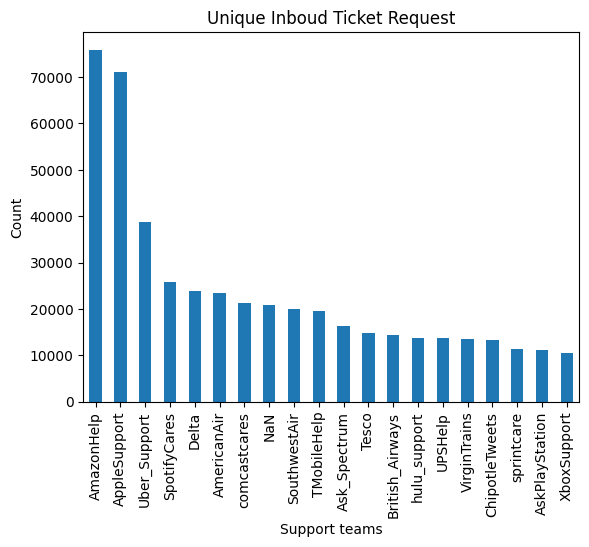

In [49]:
initial_support_count[:20].plot(kind="bar")
plt.xlabel("Support teams")
plt.ylabel("Count")
plt.title("Unique Inboud Ticket Request")
plt.show()

Looks like theres a far bit of NaN value that the requester was making. Additional information may required to find this.

In [50]:
support_team_df[support_team_df['support_team'] == 'NaN'].head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team
255,348,115798,True,Mon Aug 29 03:20:05 +0000 2011,"Lost your booking number? No worries, just dro...","349,350,351,352,347,353,354,355,356,357,358,35...",NaN,NaN
572,886,British_Airways,False,Fri Oct 27 13:36:52 +0000 2017,Get the payday party started with 40 European ...,"887,888,889,890,891,892,893,894,895,896,897,89...",NaN,NaN
657,1189,VirginTrains,False,Tue Oct 31 21:59:22 +0000 2017,#VTNEW Due to the emergency services dealing w...,"1190,1191,1192,1193,1188,1194,1195,1196,1197",NaN,NaN
698,1239,115933,True,Fri Oct 27 15:28:34 +0000 2017,@SouthwestAir helped me out to try to get thro...,"1240,1238",NaN,NaN
828,1386,115978,True,Tue Oct 31 22:09:35 +0000 2017,I think this is the first time since its birth...,"1388,1384,1389",NaN,NaN
834,1394,115980,True,Tue Oct 31 22:09:29 +0000 2017,It's Halloween and my total at @ChipotleTweets...,"1396,1392",NaN,NaN
845,1408,115985,True,Tue Oct 31 22:07:45 +0000 2017,A burrito bowl from @ChipotleTweets for just $...,"1409,1410,1407,1411,1412,1413,1414,1415",NaN,NaN
996,1575,BofA_Help,False,Tue Oct 31 21:59:37 +0000 2017,@116036 Thank you for your patience. We'll cal...,"1576,1574",NaN,NaN
1239,1835,116118,True,Tue Oct 31 10:02:46 +0000 2017,hi @Tesco an answerphone message from your del...,"1836,1833",NaN,NaN
1391,2053,SouthwestAir,False,Fri Oct 06 17:47:37 +0000 2017,Two free bags for every story. Book a seat and...,"2054,2055,2056,2057,2058,2059,2060,2061,2062,2...",NaN,NaN


In [51]:
support_team_df[support_team_df['support_team'] == 'NaN'].iloc[1]

tweet_id                                                                 886
author_id                                                    British_Airways
inbound                                                                False
created_at                                    Fri Oct 27 13:36:52 +0000 2017
text                       Get the payday party started with 40 European ...
response_tweet_id          887,888,889,890,891,892,893,894,895,896,897,89...
in_response_to_tweet_id                                                  NaN
support_team                                                             NaN
Name: 572, dtype: object

In [52]:
df[df['author_id'] == '115985']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
845,1408,115985,True,Tue Oct 31 22:07:45 +0000 2017,A burrito bowl from @ChipotleTweets for just $...,"1409,1410,1407,1411,1412,1413,1414,1415",NaN


From first glance these could be automated replies by the support team. They appear to be answer multiple tweets with the same message.

Looks like we could fix some of the missing support teams as they are found in the author id.

I am curious to see if the data changes if update to include only inbound is true.

In [53]:
support_team_inboud_true_df = support_team_df[support_team_df['inbound'] == True]

In [54]:
support_team_inboud_true_df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum
27,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum
31,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,34,NaN,VerizonSupport
33,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,38,NaN,VerizonSupport
43,49,115721,True,Tue Oct 31 21:42:09 +0000 2017,@115722 tried to pay a bill for 60 days. No se...,48,NaN,115722
53,59,115723,True,Tue Oct 31 19:54:51 +0000 2017,@115722 is the worst ISP I’ve ever had,58,NaN,VerizonSupport


In [55]:
initial_support_count_inbound_true = support_team_inboud_true_df['support_team'].value_counts()

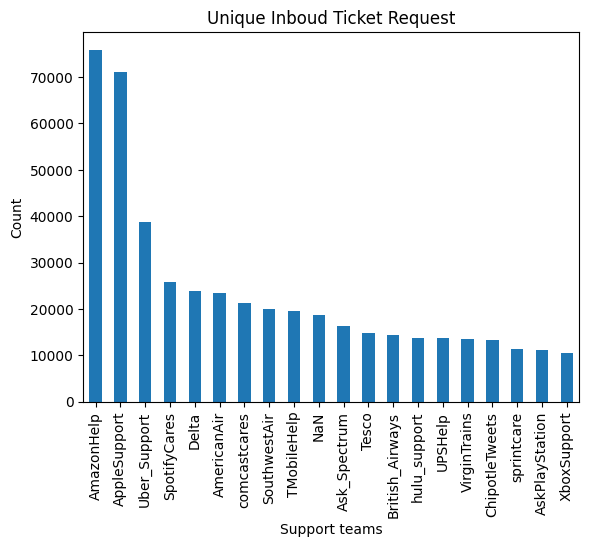

In [56]:
initial_support_count_inbound_true[:20].plot(kind="bar")
plt.xlabel("Support teams")
plt.ylabel("Count")
plt.title("Unique Inboud Ticket Request")
plt.show()

Nan values did decrease. This is far cleaner then the data beforehand.

#### Ongoing Conversation

In [57]:
support_team_inboud_true_df.head(15)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum
27,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum
31,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,34,NaN,VerizonSupport
33,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,38,NaN,VerizonSupport
43,49,115721,True,Tue Oct 31 21:42:09 +0000 2017,@115722 tried to pay a bill for 60 days. No se...,48,NaN,115722
53,59,115723,True,Tue Oct 31 19:54:51 +0000 2017,@115722 is the worst ISP I’ve ever had,58,NaN,VerizonSupport


Test out the process to fetch all the tweets into a single conversation

With each row, we need ot check the response tweet id for the next response

In [58]:
response_example = support_team_inboud_true_df['response_tweet_id'].iloc[1]

In [59]:
response_example

'17'

In [60]:
df[df['tweet_id'] == int(response_example)]

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
11,17,sprintcare,False,Tue Oct 31 19:59:13 +0000 2017,@115713 H there! We'd definitely like to work ...,16,18.0


In [61]:
stored_text_conversation = ''

stored_text_conversation = df[df['tweet_id'] == int(response_example)]['text'].values[0]

In [62]:
stored_text_conversation

"@115713 H there! We'd definitely like to work with you on this, how long have you been experiencing this issue? -AA"

In [63]:
new_response_example = df[df['tweet_id'] == int(response_example)]['in_response_to_tweet_id']

In [64]:
new_response_example

11    18.0
Name: in_response_to_tweet_id, dtype: float64

In [65]:
df[df['tweet_id'] == int(new_response_example)]

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_52264/3715148063.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  df[df['tweet_id'] == int(new_response_example)]


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN


In [66]:
new_stored_text = df[df['tweet_id'] == int(new_response_example)]['text'].values[0]

/var/folders/sk/f7k402kx1wvdmcz91gdz6hs00000gn/T/ipykernel_52264/2267104507.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  new_stored_text = df[df['tweet_id'] == int(new_response_example)]['text'].values[0]


In [67]:
new_stored_text

'@115714 y’all lie about your “great” connection. 5 bars LTE, still won’t load something. Smh.'

May need to replace line break in the future for training. This makes it easier to read

In [68]:
stored_text_conversation = stored_text_conversation + "\n" + new_stored_text

In [69]:
print(stored_text_conversation)

@115713 H there! We'd definitely like to work with you on this, how long have you been experiencing this issue? -AA
@115714 y’all lie about your “great” connection. 5 bars LTE, still won’t load something. Smh.


With the basic process found. A simple function to make this process easier

In [94]:
def getAllConversation(response_tweet_input):
    """ 
    Collects all the customer and support conversation for each request made
    Returns:
        conversation: String
        date: list of date and times
        count: number of conversation after the inital 
    """

    # values to collect
    conversation = ''
    conversation_counter = 0
    date = []

    found_response_tweet = ''
    response_tweet_input = str(response_tweet_input)

    # Due to mulple variable the response id can take, need to clean up the value
    if ',' in response_tweet_input:
        # TODO: need additonal work to split multiple reponse to one tweet
        found_response_tweet = response_tweet_input.split(',')[0]
    else:
        found_response_tweet = response_tweet_input

    while found_response_tweet != "NaN":
        # add the conversation to a string
        # print(df[df['tweet_id'] == int(found_response_tweet)]['text'])
        temp_text = df[df['tweet_id'] == int(found_response_tweet)]['text']

        if (len(temp_text) > 0):
            temp_text = temp_text.values[0]
        else:
            temp_text = "NaN"

        conversation += "\n" + temp_text

        # update the counter
        conversation_counter += 1

        # Update the date to list
        converation_date = df[df['tweet_id'] == int(found_response_tweet)]['created_at']

        if (len(converation_date) > 0):
            converation_date = converation_date.values[0]
        else:
            converation_date = "NaN"
            
        date.append(converation_date)

        # find the next tweet in the conversation
        temp_in_response = df[df['tweet_id'] == int(found_response_tweet)]['in_response_to_tweet_id']

        if (len(temp_in_response) > 0):
            temp_in_response = temp_in_response.values[0]
        else:
            temp_in_response = "NaN"

        # due to nan values when the support message end, nan is thrown and breaks the loop
        if str(temp_in_response) == 'nan' or str(temp_in_response) == 'NaN':
            break
        else:
            found_response_tweet = int(temp_in_response)
    
    return conversation, conversation_counter, date[0]

Confirm the function works as expected before running on the entire dataframe

In [71]:
test_conv = getAllConversation('9')
print(test_conv)


@115712 I would love the chance to review the account and provide assistance.
@sprintcare is the worst customer service
2
['Tue Oct 31 21:46:14 +0000 2017', 'Tue Oct 31 21:45:10 +0000 2017']


In [72]:
test_conv = getAllConversation('19')
print(test_conv)


@115715 Please send me a private message so that I can send you the link to access your account. -FR
@115714 whenever I contact customer support, they tell me I have shortcode enabled on my account, but I have never in the 4 years I've tried https://t.co/0G98RtNxPK
2
['Tue Oct 31 22:10:10 +0000 2017', 'Tue Oct 31 22:03:34 +0000 2017']


In [73]:
test_conv = getAllConversation(68)
print(test_conv)


@115729 I'm so sorry about that. Please tell us more so we can help: https://t.co/Ax7W1Dx3Y9 -Becky
@ChipotleTweets messed up today and didn’t give me my $3 burrito although I was dressed up 😭
2
['Tue Oct 31 22:14:00 +0000 2017', 'Tue Oct 31 22:03:32 +0000 2017']


In [74]:
test_conv

["\n@115729 I'm so sorry about that. Please tell us more so we can help: https://t.co/Ax7W1Dx3Y9 -Becky\n@ChipotleTweets messed up today and didn’t give me my $3 burrito although I was dressed up 😭",
 2,
 ['Tue Oct 31 22:14:00 +0000 2017', 'Tue Oct 31 22:03:32 +0000 2017']]

Create a new column with all the converations, end date, and conversation count

In [75]:
support_conversations_df = support_team_inboud_true_df.copy()

In [76]:
support_conversations_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum


Test out the funtion in a dataframe

In [95]:
test_df = support_team_inboud_true_df.copy()

In [96]:
test_df = test_df.iloc[:25]

In [97]:
test_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum


In [98]:
test_df[['conv', 'count', 'date_complete']] = test_df.apply(lambda x: getAllConversation(x['response_tweet_id']), axis=1, result_type='expand')

In [99]:
test_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conv,count,date_complete
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare,\n@115712 I would love the chance to review th...,2,Tue Oct 31 21:46:14 +0000 2017
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,\n@115713 H there! We'd definitely like to wor...,2,Tue Oct 31 19:59:13 +0000 2017
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,\n@115715 Please send me a private message so ...,2,Tue Oct 31 22:10:10 +0000 2017
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,\n@115716 The information pertaining to the ac...,2,Tue Oct 31 22:05:37 +0000 2017
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"\n@115717 Hello, My apologies for any frustrat...",2,Tue Oct 31 22:12:09 +0000 2017


In [100]:
test_df.iloc[0]

tweet_id                                                                   8
author_id                                                             115712
inbound                                                                 True
created_at                                    Tue Oct 31 21:45:10 +0000 2017
text                               @sprintcare is the worst customer service
response_tweet_id                                                     9,6,10
in_response_to_tweet_id                                                  NaN
support_team                                                      sprintcare
conv                       \n@115712 I would love the chance to review th...
count                                                                      2
date_complete                                 Tue Oct 31 21:46:14 +0000 2017
Name: 6, dtype: object

Preform the function across the entire dataframe

Creaete a new column called convesration to store the remaining text into a single column.

We can use just the initial comment for training or group together the entire support message. Ideally we will want the inital support as the conversation gives additonal context the support agent does not have yet.

Create a new column called "comment count" to capture the number comment each support ticket generates. 

We will need this to determine how long the agent is working each ticket.

Create a new column "date_completed" to capture when the ticket was "completed" (at least publicly in the tweet / x space).

We will also have the ability to calulate the mean time to resolve each support request

In [101]:
support_conversations_df[['conversation', 'comment_count', 'date_completed']] = support_conversations_df.apply(lambda x: getAllConversation(x['response_tweet_id']), axis=1, result_type='expand')

In [103]:
support_conversations_df.head(10)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,comment_count,date_completed
6,8,115712,True,Tue Oct 31 21:45:10 +0000 2017,@sprintcare is the worst customer service,"9,6,10",NaN,sprintcare,\n@115712 I would love the chance to review th...,2,Tue Oct 31 21:46:14 +0000 2017
12,18,115713,True,Tue Oct 31 19:56:01 +0000 2017,@115714 y’all lie about your “great” connectio...,17,NaN,sprintcare,\n@115713 H there! We'd definitely like to wor...,2,Tue Oct 31 19:59:13 +0000 2017
14,20,115715,True,Tue Oct 31 22:03:34 +0000 2017,"@115714 whenever I contact customer support, t...",19,NaN,sprintcare,\n@115715 Please send me a private message so ...,2,Tue Oct 31 22:10:10 +0000 2017
23,29,115716,True,Tue Oct 31 22:01:35 +0000 2017,actually that's a broken link you sent me and ...,28,NaN,Ask_Spectrum,\n@115716 The information pertaining to the ac...,2,Tue Oct 31 22:05:37 +0000 2017
25,31,115717,True,Tue Oct 31 22:06:54 +0000 2017,"Yo @Ask_Spectrum, your customer service reps a...",30,NaN,Ask_Spectrum,"\n@115717 Hello, My apologies for any frustrat...",2,Tue Oct 31 22:12:09 +0000 2017
27,33,115718,True,Tue Oct 31 22:06:56 +0000 2017,My picture on @Ask_Spectrum pretty much every ...,32,NaN,Ask_Spectrum,\n@115718 I apologize for the inconvenience. I...,2,Tue Oct 31 22:10:08 +0000 2017
31,36,115719,True,Tue Oct 31 22:10:46 +0000 2017,somebody from @VerizonSupport please help meee...,34,NaN,VerizonSupport,\n@115719 Help has arrived! We are sorry to se...,2,Tue Oct 31 22:13:33 +0000 2017
33,39,115720,True,Tue Oct 31 22:12:16 +0000 2017,@VerizonSupport My friend is without internet ...,38,NaN,VerizonSupport,\n@115720 Have your friend message us.\n^ACM\n...,2,Tue Oct 31 22:13:30 +0000 2017
43,49,115721,True,Tue Oct 31 21:42:09 +0000 2017,@115722 tried to pay a bill for 60 days. No se...,48,NaN,115722,\n@115721 Are you referring to wireless or res...,2,Tue Oct 31 21:49:31 +0000 2017
53,59,115723,True,Tue Oct 31 19:54:51 +0000 2017,@115722 is the worst ISP I’ve ever had,58,NaN,VerizonSupport,\n@115723 What did we do to make you feel this...,2,Tue Oct 31 19:57:30 +0000 2017


In [104]:
support_conversations_df.iloc[0]

tweet_id                                                                   8
author_id                                                             115712
inbound                                                                 True
created_at                                    Tue Oct 31 21:45:10 +0000 2017
text                               @sprintcare is the worst customer service
response_tweet_id                                                     9,6,10
in_response_to_tweet_id                                                  NaN
support_team                                                      sprintcare
conversation               \n@115712 I would love the chance to review th...
comment_count                                                              2
date_completed                                Tue Oct 31 21:46:14 +0000 2017
Name: 6, dtype: object

In [107]:
print(support_conversations_df['conversation'].iloc[0])


@115712 I would love the chance to review the account and provide assistance.
@sprintcare is the worst customer service


In [114]:
support_conversations_df['comment_count'].max()

2

In [117]:
support_conversations_df[support_conversations_df['support_team'] == 'AmazonHelp']

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,support_team,conversation,comment_count,date_completed
187,272,115770,True,Wed Nov 22 09:14:39 +0000 2017,amazonのfireTVstickが見れない😢,269,NaN,AmazonHelp,\n@115770 こんにちは、アマゾン公式です。Fire TV Stickが見れないという...,2,Wed Nov 22 09:23:01 +0000 2017
235,325,115792,True,Wed Nov 22 08:55:35 +0000 2017,amazonプライムビデオ、再生エラーが多いです,324,NaN,AmazonHelp,\n@115792 ご不便をおかけしております。アプリをご利用でしょうか。強制停止&gt;端...,2,Wed Nov 22 09:06:00 +0000 2017
325,617,115820,True,Tue Oct 31 22:16:32 +0000 2017,Way to drop the ball on customer service @1158...,615,NaN,AmazonHelp,\n@115820 I'm sorry we've let you down! Withou...,2,Tue Oct 31 22:29:00 +0000 2017
327,621,115822,True,Tue Oct 31 22:19:34 +0000 2017,@115823 I want my amazon payments account CLOS...,620,NaN,AmazonHelp,\n@115822 I am unable to affect your account v...,2,Tue Oct 31 22:28:34 +0000 2017
331,624,115824,True,Tue Oct 31 22:12:37 +0000 2017,"@115825 also, beim Addams Family-Film in Prime...",622,NaN,AmazonHelp,"\n@115824 Hi, wir erhalten die Filme/Serien so...",2,Tue Oct 31 22:28:00 +0000 2017
...,...,...,...,...,...,...,...,...,...,...,...
2811641,2987820,823830,True,Wed Nov 22 06:00:24 +0000 2017,Amazonで注文したDVDがまだ届かない･･･\n昨日まで到着予定なんだけど問い合わせする...,2987819,NaN,AmazonHelp,\n@823830 ご心配をおかけしております。ご案内しているお届け予定日を経過しても未着の...,2,Wed Nov 22 06:19:27 +0000 2017
2811643,2987822,823831,True,Wed Nov 22 06:10:09 +0000 2017,たいへん！！Amazonでピンク動画見たら請求来た！！私の消息途絶えたらAmazonに社会か...,2987821,NaN,AmazonHelp,\n@823831 該当のメッセージは、https://t.co/st4oU5QbhPからお...,2,Wed Nov 22 06:17:26 +0000 2017
2811722,2987901,823853,True,Wed Nov 22 07:07:30 +0000 2017,架空請求きたよww\n\nしかとショートメールでAmazon相談係。 https://t.c...,2987900,NaN,AmazonHelp,\n@823853 ご承知のとおり、残念ながら悪質な詐欺が増加しているようですのでお気を付け...,2,Wed Nov 22 07:09:54 +0000 2017
2811724,2987903,823854,True,Wed Nov 22 07:04:14 +0000 2017,Señores de @116928 estoy confuso sobre el públ...,2987902,NaN,AmazonHelp,\n@823854 ¡Hola Crispín! Lamento mucho la conf...,2,Wed Nov 22 07:09:53 +0000 2017


Text(0, 0.5, 'Count')

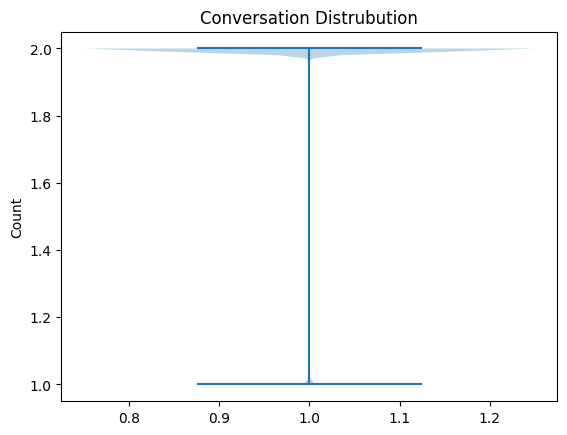

In [121]:
plt.violinplot(support_conversations_df['comment_count'])
plt.title("Conversation Distrubution")
plt.ylabel("Count")